In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce

# banco clientes: id do cliente, id único, cep, cidade, estado
clientes = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_customers_dataset.csv")

# banco itens = id do pedido, id do item do pedido, id do produto, id do vendedor, data limite de envio, preço do pedido, preço do frete
itens = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_items_dataset.csv")

# banco pagamento = id do pedido, sequência do pagamento, tipo de pagamento, parcelamento do pagamento, valor do pagamento
pagamento = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_payments_dataset.csv")

# banco reviews = id da review, id do pedido, avaliação (1-5), título, mensagem, data de criação, data/hora
reviews = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_reviews_dataset.csv")

# banco pedido = id do pedido, id do cliente, status do pedido, data/hora pedido, data de aprovação, data de entrega da transportadora, entrega cliente(data), entrega estimada(data)
pedido = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_orders_dataset.csv")

# banco produtos = id do produto, categoria, tamanho do nome, tamanho descrição, quanti de fotos, peso (gr), comprimento (cm), altura(cm), largura(cm)
produtos = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_products_dataset.csv")

# banco vendedores = id do vendedor, prefixo do cep do vendedor, cidade do vendedor, estado do vendedor
vendedores = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_sellers_dataset.csv")

In [4]:
def medidas_resumo(dados, variavel, coluna): 
    #criar um loop for que vai calcular as médias, desvio padrão, máximo, mínimo, quantis e mediana de um banco de dados
    # depois juntar eles em um data.frame
    media = dados.groupby(variavel)[coluna].mean().round(2)
    desvio = dados.groupby(variavel)[coluna].std().round(2)
    mediana = dados.groupby(variavel)[coluna].median().round(2)
    maximo = dados.groupby(variavel)[coluna].max().round(2)
    minimo = dados.groupby(variavel)[coluna].min().round(2)
    quanti25 = dados.groupby(variavel)[coluna].quantile(.25).round(2)
    quanti75 = dados.groupby(variavel)[coluna].quantile(.75).round(2)
    
    resultado = pd.DataFrame([media, desvio, minimo, quanti25, mediana, quanti75, maximo])
    resultado = resultado.transpose()
    resultado.columns = ["Média", "Desvio_padrão", "Mínimo", "Primeiro_quartil", "Mediana", "Terceiro_quartil", "Máximo"]
    resultado2 = resultado.transpose()
    return(resultado2)

# testar para ver se dá de fazer um boxplot com os dados

# Tipo de pagamento e tempo médio de aprovação (horas)

# Tipo de pagamento e tempo de aprovação (horas)

In [5]:
## Tipo de pagamento x tempo de aprovação
aprov = pagamento.merge(pedido)
aprov = aprov.loc[:,["payment_type","order_purchase_timestamp","order_approved_at"]]
aprov.rename(columns={"payment_type":"tipo_pagamento", "order_purchase_timestamp":"hora_pedido",
                      "order_approved_at":"hora_aprovado"}, inplace=True)
aprov #103886 obs
aprov = aprov[aprov["tipo_pagamento"] != "not_defined"]
aprov #103883 obs 

,tipo_pagamento,hora_pedido,hora_aprovado
0,credit_card,2018-04-25 22:01:49,2018-04-25 22:15:09
1,credit_card,2018-06-26 11:01:38,2018-06-26 11:18:58
2,credit_card,2017-12-12 11:19:55,2017-12-14 09:52:34
3,credit_card,2017-12-06 12:04:06,2017-12-06 12:13:20
4,credit_card,2018-05-21 13:59:17,2018-05-21 16:14:41
...,...,...,...
103881,boleto,2018-03-08 16:57:23,2018-03-10 03:55:25
103882,credit_card,2017-08-18 09:45:35,2017-08-18 10:04:56
103883,credit_card,2017-11-18 17:27:14,2017-11-18 17:46:05
103884,credit_card,2018-08-07 23:26:13,2018-08-07 23:45:00


In [6]:
aprov["hora_pedido"] = pd.to_datetime(aprov['hora_pedido'], format='%Y-%m-%d %H:%M:%S')
aprov["hora_aprovado"] = pd.to_datetime(aprov['hora_aprovado'], format='%Y-%m-%d %H:%M:%S')
aprov["tempo"] = (aprov["hora_aprovado"] - aprov["hora_pedido"]).dt.total_seconds()/3600
medidas_resumo(aprov, "tipo_pagamento", "tempo")

tipo_pagamento,boleto,credit_card,debit_card,voucher
Média,33.12,4.60,9.54,8.64
Desvio_padrão,28.52,21.84,29.62,19.14
Mínimo,0.00,0.00,0.00,0.00
Primeiro_quartil,15.06,0.20,0.25,0.20
Mediana,29.07,0.27,0.85,0.28
Terceiro_quartil,39.86,0.61,8.76,2.84
Máximo,1450.87,4509.18,676.07,285.31


C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='tipo_pagamento', ylabel='tempo'>

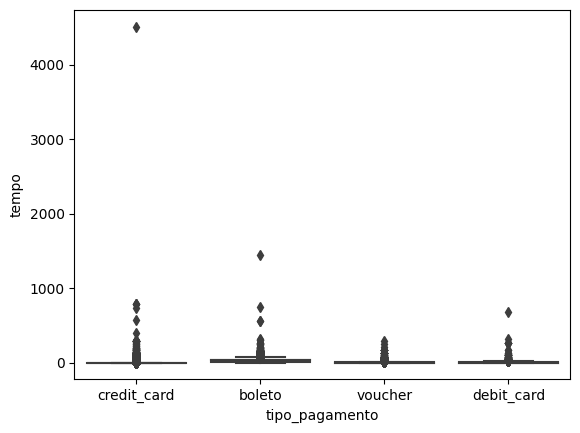

In [7]:
sns.boxplot(x="tipo_pagamento", y ="tempo", data=aprov)

# Tempo médio de entrega por categoria de produto

In [8]:
ans2 = itens.merge(produtos).merge(pedido).loc[:,["order_id","product_id","product_category_name","order_delivered_customer_date","order_approved_at", "price"]]
ans2.columns = ["pedido", "produto", "categoria", "data_entrega", "data_aprovado", "valor"]
ans2["data_entrega"] = pd.to_datetime(ans2['data_entrega'], errors='coerce')
ans2["data_aprovado"] = pd.to_datetime(ans2['data_aprovado'], errors='coerce')
ans2

,pedido,produto,categoria,data_entrega,data_aprovado,valor
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-09-20 23:43:48,2017-09-13 09:45:35,58.9
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-07-13 20:39:29,2017-06-29 02:44:11,55.9
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2018-06-04 18:34:26,2018-05-18 12:31:43,64.9
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-09 21:26:33,2017-08-01 18:55:08,58.9
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-24 20:04:21,2017-08-10 22:05:11,58.9
...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,2018-07-23 19:44:45,2018-07-13 20:23:55,129.9
112646,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,2018-08-21 12:18:57,2018-08-18 10:10:11,99.0
112647,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,2017-06-08 13:04:40,2017-06-01 17:05:23,736.0
112648,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2018-01-08 18:23:10,2017-12-18 17:33:04,229.9


In [9]:
ans2["tempo"] = (ans2["data_entrega"]-ans2["data_aprovado"]).dt.days
ans22 = medidas_resumo(ans2, "categoria", "tempo")
ans22.transpose()

,Média,Desvio_padrão,Mínimo,Primeiro_quartil,Mediana,Terceiro_quartil,Máximo
categoria,,,,,,,
agro_industria_e_comercio,10.36,7.59,1.0,5.00,8.0,14.0,52.0
alimentos,8.75,10.86,0.0,3.00,6.0,11.0,138.0
alimentos_bebidas,9.92,8.35,1.0,6.00,7.0,12.0,55.0
artes,10.29,6.75,-2.0,6.00,9.0,14.0,42.0
artes_e_artesanato,4.50,3.30,1.0,2.75,4.0,6.0,17.0
...,...,...,...,...,...,...,...
sinalizacao_e_seguranca,9.23,9.34,-1.0,4.00,7.0,12.0,102.0
tablets_impressao_imagem,12.02,7.30,1.0,7.00,10.0,14.0,40.0
telefonia,11.86,9.02,-3.0,6.00,10.0,15.0,166.0


C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='tempo', ylabel='categoria'>

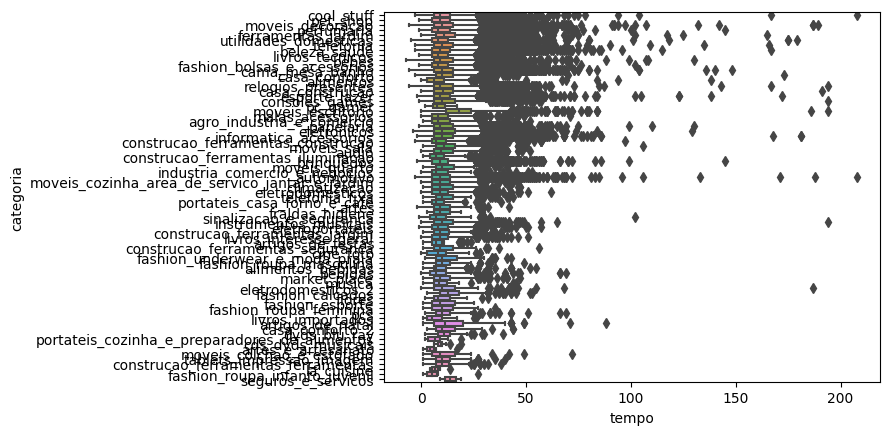

In [11]:
sns.boxplot(data= ans2, x="tempo", y="categoria")

Como existem 73 categorias de produto e fica ruim a visualização delas nos gráficos, vou selecionar 5 com maiores gastos e 5 com menores gastos

C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

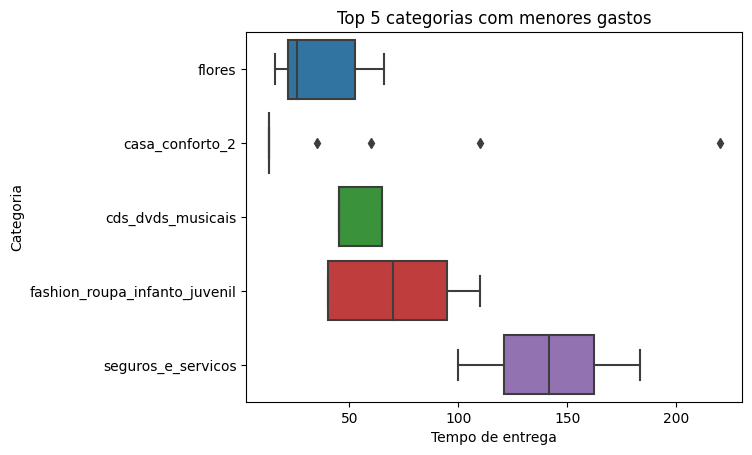

In [17]:
# selecionando as 5 categorias com maiores gastos e as 5 com menores gastos
ans2.groupby("categoria").sum("valor").sort_values("valor").iloc[0:5,0:1] # menores gastos
menores = ["seguros_e_servicos", "fashion_roupa_infanto_juvenil","cds_dvds_musicais", "casa_conforto_2","flores"]
top5men = ans2[ans2['categoria'].isin(menores)]
ax = sns.boxplot(data=top5men, y = "categoria", x="valor")
ax.set(xlabel='Tempo de entrega', ylabel='Categoria', title="Top 5 categorias com menores gastos")
plt.show()

C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

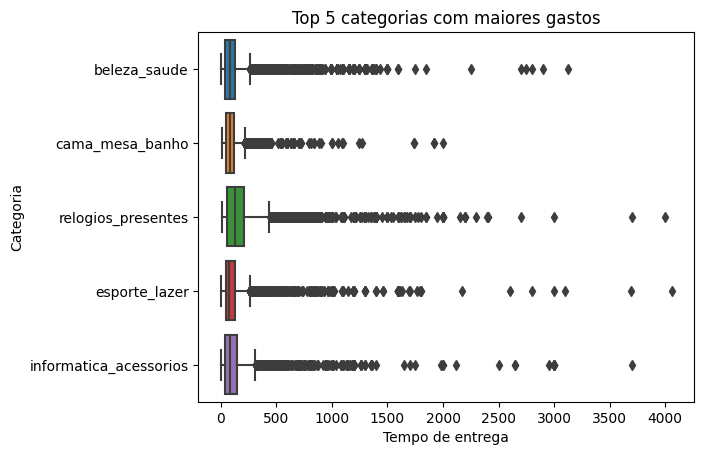

In [18]:
ans2.groupby("categoria").sum("valor").sort_values("valor").iloc[68:73,0:1] # maiores gastos
maiores = ["informatica_acessorios", "esporte_lazer","cama_mesa_banho", "relogios_presentes","beleza_saude"]
top5mai = ans2[ans2['categoria'].isin(maiores)]
bx = sns.boxplot(data= top5mai, y="categoria", x="valor")
bx.set(xlabel='Tempo de entrega', ylabel='Categoria', title="Top 5 categorias com maiores gastos")
plt.show()

In [19]:
medidas_resumo(top5men, "categoria", "valor")

categoria,casa_conforto_2,cds_dvds_musicais,fashion_roupa_infanto_juvenil,flores,seguros_e_servicos
Média,25.34,52.14,71.23,33.64,141.64
Desvio_padrão,41.67,9.94,31.83,16.74,58.89
Mínimo,12.90,45.00,39.99,15.60,100.00
Primeiro_quartil,12.90,45.00,39.99,21.60,120.82
Mediana,12.90,45.00,69.94,25.99,141.64
Terceiro_quartil,12.90,65.00,94.99,52.50,162.47
Máximo,219.99,65.00,110.00,65.90,183.29


In [20]:
medidas_resumo(top5mai, "categoria", "valor")

categoria,beleza_saude,cama_mesa_banho,esporte_lazer,informatica_acessorios,relogios_presentes
Média,130.16,93.30,114.34,116.51,201.14
Desvio_padrão,179.50,82.13,162.47,169.97,256.74
Mínimo,1.20,6.99,4.50,3.90,8.99
Primeiro_quartil,39.99,47.99,44.32,39.90,59.94
Mediana,79.90,79.05,78.00,81.99,129.00
Terceiro_quartil,129.90,115.00,129.99,149.00,209.99
Máximo,3124.00,1999.98,4059.00,3699.99,3999.90


# Parcelas e pagamentos

C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='payment_installments', ylabel='payment_value'>

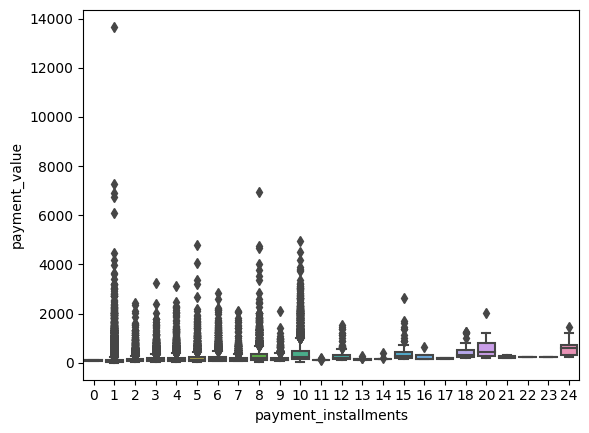

In [21]:
sns.boxplot(data=pagamento, x="payment_installments", y="payment_value")

In [22]:
medidas_resumo(pagamento, "payment_installments", "payment_value").transpose()

,Média,Desvio_padrão,Mínimo,Primeiro_quartil,Mediana,Terceiro_quartil,Máximo
payment_installments,,,,,,,
0,94.32,50.38,58.69,76.50,94.32,112.13,129.94
1,112.42,177.56,0.00,43.31,73.34,127.37,13664.08
2,127.23,112.15,20.03,64.00,109.42,155.73,2442.82
3,142.54,132.79,30.00,67.22,110.42,175.60,3256.14
4,163.98,172.06,40.00,71.46,117.18,207.30,3126.50
5,183.47,208.76,49.99,75.21,125.97,223.72,4809.44
6,209.85,220.51,59.99,80.19,138.55,242.48,2828.42
7,187.67,201.99,69.97,76.76,140.07,193.39,2094.44
8,307.74,330.23,37.58,130.15,212.70,358.46,6929.31


# Regressão

In [24]:
df = itens.merge(pagamento)

In [25]:
df[["freight_value", "price", "payment_installments"]].corr()

,freight_value,price,payment_installments
freight_value,1.000000,0.415809,0.186020
price,0.415809,1.000000,0.278645
payment_installments,0.186020,0.278645,1.000000


C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\natyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Valor do frete'), Text(0, 0.5, 'Valor do pedido')]

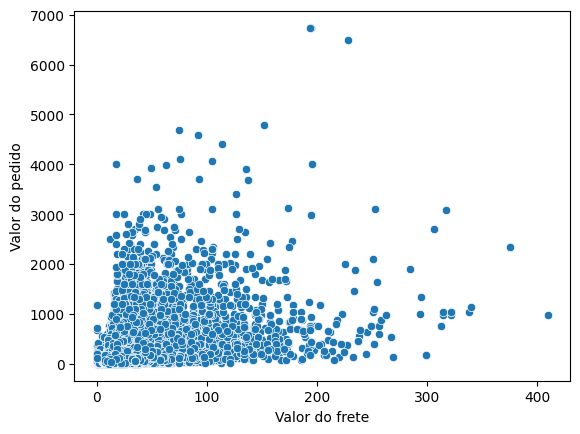

In [27]:
ax = sns.scatterplot(data = itens,
                x= "freight_value",
                y = 'price')
ax.set(xlabel = "Valor do frete", ylabel = "Valor do pedido")

Dado que os dois estão com correlação relativamente moderada e positiva, vamos usar o que tem a maior correlação: preço do pedido e valor do frete

In [32]:
from sklearn.linear_model import LinearRegression

In [28]:
preco_observado = np.array(df["payment_value"])
frete = np.array(df["freight_value"])
preco_observado

array([ 72.19, 259.83, 216.87, ..., 116.85,  64.71,  55.79])

In [29]:
regressores = frete.reshape((-1,1))
regressores

array([[13.29],
       [19.93],
       [17.87],
       ...,
       [16.95],
       [ 8.72],
       [12.79]])

Estamos considerando a variável "Preço do pedido" como a variável resposta e "valor do frete" como variável explicativa

In [30]:
features = variaveis_independentes = regressores
alvos = variaveis_dependentes = variaveis_resposta = variaveis_de_desfecho = preco_observado

In [33]:
modelo = LinearRegression().fit(regressores,preco_observado)

In [34]:
b0 = modelo.intercept_
b1 = modelo.coef_
print(b0)
print(b1)

46.24012178292419
[6.30782655]


In [35]:
preco_estimado = modelo.predict(regressores)
erros_lineares = preco_observado - preco_estimado
erro_quadratico_medio = np.mean(np.square(erros_lineares))
erro_quadratico_medio

61595.02248865835